# 01: Creating a Surge Instance and Playing a Note

The surge python API is documented through a set of docstrings and this set of ipython notebooks.
The iPython notebooks show practical approaches to the API from simple to more advanced cases.

This first notebook shows the simplest use case - loading surgepy, playing a single note, and
both hearing and seeing the output.

To load surgepy your environment needs to be able to find the dll you have built. The build
instructions are simple. Checkout surge from source and then run

```
git submodule update --init --recursive
cmake -B<dir> -DBUILD_SURGE_PYTHON_BINDINGS=TRUE
cmake --build <dir> --config Release --target surgepy
cmake --build <dir> --config Release --target install-resources-local
```

then place `<dir>` in the path of your python. We do that in these scripts with `sys.path.append`

In [1]:
import sys
sys.path.append( "../../surge/cmake-build-debug-xc" )

Once that is done, we can import the surgepy module and check our build version

In [2]:
import surgepy

surgepy.getVersion()

'1.8.more-python.185c1075'

There's a few standard imports which make life easy which I will grab here

In [3]:
import numpy as np
import math
import IPython

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

At this point, we are ready to create a surge instance and play a note or two. We use the APIs to create a memory
region and render into it, and play and release a set of notes against the default init patch.

In [4]:
s = surgepy.createSurge(44100)
twosecondsInBlocks = int( 2 * s.getSampleRate() / s.getBlockSize() )
buf = s.createMultiBlock( twosecondsInBlocks )

# Play alternating .05 second silence, .4 seconds note, 0.05 second silence
pos = 0;
silence = int( 0.05 * s.getSampleRate() / s.getBlockSize() )
hold = int( 0.4 * s.getSampleRate() / s.getBlockSize() )
for i in range( 4 ):
    s.processMultiBlock(buf, pos, silence )
    pos = pos + silence
    
    # Play note on channel 0 at velcity 127 with 0 detune
    s.playNote( 0, 60 + i * 7, 127, 0 )
    s.processMultiBlock( buf, pos, hold )
    pos = pos + hold
    
    # and release the note
    s.releaseNote( 0, 60 + i * 7, 0 )
    s.processMultiBlock(buf, pos, silence )
    pos = pos + silence
    
np.shape(buf)

(2, 88192)

Text(0, 0.5, 'Wave')

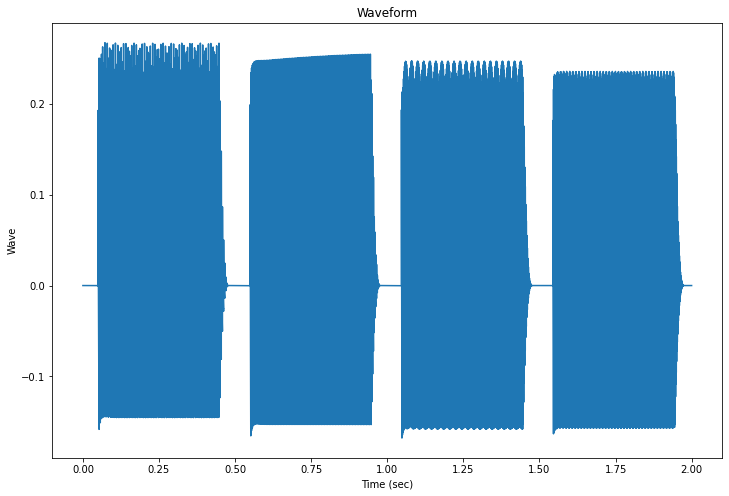

In [5]:
t = np.linspace(0,np.shape(buf)[1] * 1.0 / s.getSampleRate(),np.shape(buf)[1])
plt.plot(t, buf[0])
plt.title( "Waveform")
plt.xlabel( "Time (sec)")
plt.ylabel( "Wave" )

In [6]:
IPython.display.Audio( buf, rate=s.getSampleRate() )